In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import torch
from torch import nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
import os
import glob
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors

from sklearn import datasets, linear_model, metrics
  
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split
pd.set_option('display.max_colwidth', None)

np.random.seed(0)

In [2]:
data_dir = Path('./Data_Files')

In [3]:
# Params
params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

In [4]:
df1 = pd.read_csv(data_dir / "+60degrees.csv", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df2 = pd.read_csv(data_dir / "0degrees.csv", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df3 = pd.read_csv(data_dir / "16cm_away.csv", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df4 = pd.read_csv(data_dir / "180.csv", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df5 = pd.read_csv(data_dir / "32cm_away.csv", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df6 = pd.read_csv(data_dir / "80cm_away.csv", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df7 = pd.read_csv(data_dir / "air.csv", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df8 = pd.read_csv(data_dir / "minus_60degrees.csv", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df9 = pd.read_csv(data_dir / "no_air_.csv", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df10 = pd.read_csv(data_dir / "vent_air.csv", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df11 = pd.read_csv(data_dir / "very_close_to_vent.csv", low_memory=False, names= ['frequency','amplitude'] , index_col = False)

In [5]:
data_dir2 = Path("./Jun30_data_files/")

In [6]:
# for dir,subdir,files in os.walk(data_dir2):
#     for i in files:
#         print (i)
#         if i=="test2.txt" and i == "TEST2.TXT.sb-5b453c2d-NvFVlZ":
#             continue
#         dataframe = pd.read_csv(data_dir2 / i, low_memory=False, names= ['frequency','amplitude'] , index_col = False)
#         dataframe = dataframe[dataframe['frequency'] != "clocktime"]
#         print(dataframe)
#         dataframe = dataframe.dropna()
#         #dataframe = dataframe[:129]
#         #print(dataframe[:129*7])
#         df12 = df12.append(dataframe)

In [7]:
df12 = pd.read_csv(data_dir2 / "Dist1_4.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df12 = df12[df12['frequency'] != "clocktime"]


df13 = pd.read_csv(data_dir2 / "Dist1_6.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df13 = df13[df13['frequency'] != "clocktime"]


df14 = pd.read_csv(data_dir2 / "Dist1_8.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df14 = df14[df14['frequency'] != "clocktime"]


df15 = pd.read_csv(data_dir2 / "Dist1.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df15 = df15[df15['frequency'] != "clocktime"]
df15 = df15[:129*2]

df16 = pd.read_csv(data_dir2 / "Dist2.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df16 = df16[df16['frequency'] != "clocktime"]

df17 = pd.read_csv(data_dir2 / "Dist1_2.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df17 = df17[df17['frequency'] != "clocktime"]

df18 = pd.read_csv(data_dir2 / "Dist0_5.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df18 = df18[df18['frequency'] != "clocktime"]

df19 = pd.read_csv(data_dir2 / "Dist0_3.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df19 = df19[df19['frequency'] != "clocktime"]


In [8]:
df19[:129]

,frequency,amplitude
0,0.00,62997.4405
1,62.50,27144.8022
2,125.00,200.6097
3,187.50,174.9460
4,250.00,155.6979
...,...,...
124,3812.50,6.6091
125,3875.00,3.3312
126,3937.50,8.6702
127,4000.00,4.8962


In [9]:
data_dir3 = Path("./July1_data_files/") 

df20 = pd.read_csv(data_dir3 / "Dist10cm.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df20 = df20[df20['frequency'] != "clocktime"]

df21 = pd.read_csv(data_dir3 / "Dist15cm.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df21 = df21[df21['frequency'] != "clocktime"]
df21 = df21[:129*4]

df22 = pd.read_csv(data_dir3 / "Dist20cm.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df22 = df22[df22['frequency'] != "clocktime"]

df23 = pd.read_csv(data_dir3 / "Dist25cm.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df23 = df23[df23['frequency'] != "clocktime"]

df24 = pd.read_csv(data_dir3 / "Dist30cm.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df24 = df24[df24['frequency'] != "clocktime"]


In [10]:
df21[:129*2]

,frequency,amplitude
0,0.00,64181.0745
1,62.50,27679.9321
2,125.00,805.2501
3,187.50,612.9744
4,250.00,54.4231
...,...,...
254,4687.50,2.0852
255,4750.00,4.8306
256,4812.50,6.7667
257,4875.00,4.1614


In [11]:
data_dir4 = Path("./July8/") 

df25 = pd.read_csv(data_dir4 / "check.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df25 = df25[df25['frequency'] != "clocktime"]
df25 = df25.dropna()
df25

,frequency,amplitude
0,0.00,54508.3419
1,62.50,23471.8577
2,125.00,222.4883
3,187.50,65.2300
4,250.00,22.4759
...,...,...
18844,7750.00,34.0706
18845,7812.50,72.1740
18846,7875.00,45.6315
18847,7937.50,12.6362


In [12]:
data_dir5 = Path("./19July/") 

df26 = pd.read_csv(data_dir5 / "check.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df26 = df26[df26['frequency'] != "clocktime"]
df26 = df26.dropna()


df27 = pd.read_csv(data_dir5 / "desk.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df27 = df27[df27['frequency'] != "clocktime"]
df27 = df27.dropna()

df28 = pd.read_csv(data_dir5 / "desk2.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df28 = df28[df28['frequency'] != "clocktime"]
df28 = df28.dropna()




In [13]:
df26 = df26[:129*145]

In [14]:
df28 = df28[:129*180]

In [15]:
data_dir6 = Path("./new_files_july23/") 

df29 = pd.read_csv(data_dir6 / "desk.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df29 = df29[df29['frequency'] != "clocktime"]
df29 = df29.dropna()

df30 = pd.read_csv(data_dir6 / "no_air.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df30 = df30[df30['frequency'] != "clocktime"]
df30 = df30.dropna()

df31 = pd.read_csv(data_dir6 / "onvent.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df31 = df31[df31['frequency'] != "clocktime"]
df31 = df31.dropna()

In [16]:
df31[:129*2]

,frequency,amplitude
0,0.00,67943.6656
1,62.50,29039.8095
2,125.00,277.4737
3,187.50,144.1827
4,250.00,30.2149
...,...,...
254,7750.00,2.7512
255,7812.50,10.3171
256,7875.00,4.5367
257,7937.50,9.5936


In [17]:
df = df1.append([df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df16, df17, df18, df20, df22, df23, df24, df25, df26, df27, df28, df29, df30, df31])
# df = df29.append([df30, df31])

In [18]:
df = df.dropna()
df[:129*800]

,frequency,amplitude
0,0.00,74691.3654
1,62.50,31866.3058
2,125.00,285.2973
3,187.50,330.8644
4,250.00,68.8822
...,...,...
34964,7750.00,28.2757
34965,7812.50,19.3028
34966,7875.00,25.7998
34967,7937.50,23.6491


In [19]:
def convert(df: pd.DataFrame, frame_size=129):
    x = np.asarray(df.iloc[:, 1]).reshape(-1, frame_size)
#     x = x[x.shape[0]//10:-x.shape[0]//10]
    return x

In [20]:
# df = df[df.columns[1:2]]
df

,frequency,amplitude
0,0.00,74691.3654
1,62.50,31866.3058
2,125.00,285.2973
3,187.50,330.8644
4,250.00,68.8822
...,...,...
34964,7750.00,28.2757
34965,7812.50,19.3028
34966,7875.00,25.7998
34967,7937.50,23.6491


In [21]:
data = convert(df)
data.shape


(433, 129)

In [22]:
X = data[:,:-1]

X = X[:, :9]
X.shape

(433, 9)

In [23]:
y = data[:, -1]
y.shape
# print(y)

(433,)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [25]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)


LinearRegression()

In [26]:
y_pred = reg.predict(X_test)
y_train_pred = reg.predict(X_train)

In [27]:
print(y_pred[:5])
print(y_test[:5])

[24.8412608  11.82281216 21.21558687 18.92152496 12.12525079]
[28.11  3.74 28.11 28.11  3.36]


In [28]:
print(y_train_pred[:5])
print(y_train[:5])

[37.29275689 27.10962746 20.88632192 15.89533707 26.72235813]
[29.09 28.11 29.42 28.44 28.76]


In [29]:
print("MSE of test: ", mean_squared_error(y_test, y_pred))

MSE of test:  70.57322910714336


In [30]:
print("MSE of training: ",  mean_squared_error(y_train, y_train_pred))

MSE of training:  80.0577846912536


Text(0.5, 1.0, 'Estimating Airflow (XGBoost)')

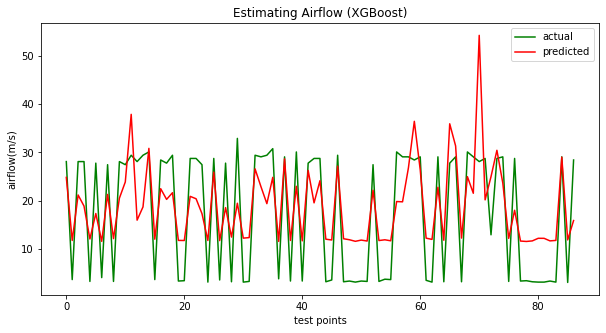

In [31]:
plt.figure(figsize=(10,5))
plt.plot(y_test, 'g', label="actual")
plt.plot(y_pred, 'r', label="predicted")
plt.legend()
plt.xlabel("test points")
plt.ylabel("airflow(m/s)")
plt.title("Estimating Airflow (XGBoost)")